In [67]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from models.temporal_nets import LSTM
from dataset.machflowdata import MachFlowData
import yaml

In [4]:
lstm = LSTM.load_from_checkpoint('/landclim/kraftb/machflow/runs/staticall_allbasins_sqrttrans/LSTM/xval/fold_000/checkpoints/best.ckpt')

In [43]:
with open('/net/argon/landclim/kraftb/machflow/runs/staticall_allbasins_sqrttrans/LSTM/xval/fold_000/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

In [102]:
ds = xr.open_zarr('/net/argon/landclim/kraftb/machflow/data/harmonized_basins.zarr')
df = pd.read_csv('/net/argon/landclim/kraftb/machflow/data/droughch/forecast_extract.csv')

ds = ds.sel(station=df.mach_ID.unique())

s = torch.tensor(ds[config['data']['init_args']['stat_features']].to_array(
    'variable').transpose('station', ...).values.astype('float32'))

member = df.member.unique()[0]
df_member = df[df.member == member]

x = torch.tensor(np.stack(
        df_member.groupby('mach_ID')[config['data']['init_args']['features']].apply(lambda x: x.to_numpy().astype('float32')), axis=0
    ))

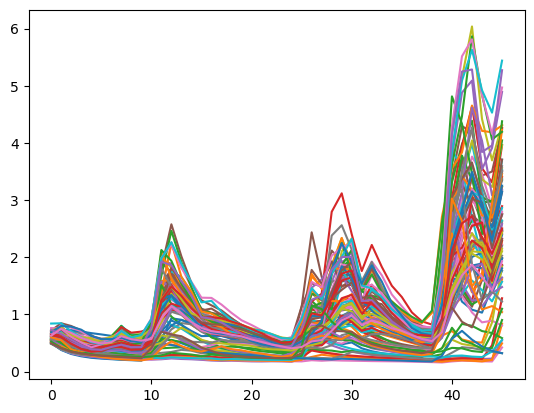

In [105]:
plt.plot(lstm(x.transpose(1, 2), s, 0.5).squeeze().detach().T);

<xarray.Dataset> Size: 423MB
Dimensions:      (station: 574, time: 23010)
Coordinates:
  * station      (station) <U9 21kB 'CHAG-0001' 'CHAG-0002' ... 'MACH-0076'
  * time         (time) datetime64[ns] 184kB 1961-01-01 ... 2023-12-31
Data variables: (12/41)
    E            (station, time) float32 53MB dask.array<chunksize=(1, 23010), meta=np.ndarray>
    P            (station, time) float32 53MB dask.array<chunksize=(1, 23010), meta=np.ndarray>
    Qm3s         (station, time) float32 53MB dask.array<chunksize=(1, 23010), meta=np.ndarray>
    Qm3s_prevah  (station, time) float64 106MB dask.array<chunksize=(1, 23010), meta=np.ndarray>
    Qmm          (station, time) float32 53MB dask.array<chunksize=(1, 23010), meta=np.ndarray>
    Qmm_prevah   (station, time) float32 53MB dask.array<chunksize=(1, 23010), meta=np.ndarray>
    ...           ...
    pus22        (station) float32 2kB dask.array<chunksize=(574,), meta=np.ndarray>
    pus24        (station) float32 2kB dask.array<chunksize=(574,), meta=np.ndarray>
    pus25        (station) float32 2kB dask.array<chunksize=(574,), meta=np.ndarray>
    pus26        (station) float32 2kB dask.array<chunksize=(574,), meta=np.ndarray>
    pus29        (station) float32 2kB dask.array<chunksize=(574,), meta=np.ndarray>
    slp          (station) float32 2kB dask.array<chunksize=(574,), meta=np.ndarray>